<a href="https://colab.research.google.com/github/mssabahi/Deep_Learning/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NN classification with TensorFlow

A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

* Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.

We're going to go through doing the following with TensorFlow:

* Architecture of a classification model
* Input shapes and output shapes
  * X: features/data (inputs)
  * y: labels (outputs)
    * "What class do the inputs belong to?"
* Creating custom data to view and fit
* Steps in modelling for binary and mutliclass classification
  * Creating a model
  * Compiling a model
    * Defining a loss function
  * Setting up an optimizer
    * Finding the best learning rate
    * Creating evaluation metrics
  * Fitting a model (getting it to find patterns in our data)
  * Improving a model
* The power of non-linearity
* Evaluating classification models
  * Visualizng the model ("visualize, visualize, visualize")
  * Looking at training curves
  * Compare predictions to ground truth (using our evaluation metrics)

Typical architecture of a classification neural network
The word typical is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:

* An input layer.
* Some hidden layers.
* An output layer.
Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.


**Typical architecture of a classification network.** Source: Adapted from page 295 of Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron

https://drive.google.com/file/d/1Y4Wf9sEfFBEMK0hI_fsC6pvavZLRNMlQ/view?usp=sharing
![](https://drive.google.com/uc?id=1Y4Wf9sEfFBEMK0hI_fsC6pvavZLRNMlQ)


In [1]:
import tensorflow as tf
tf.__version__

'2.7.0'

# Creating data to view and fit
We could start by importing a classification dataset but let's practice making some of our own classification data.

🔑 Note: It's a common practice to get you and model you build working on a toy (or simple) dataset before moving to your actual problem. Treat it as a rehersal experiment before the actual experiment(s).

Since classification is predicting whether something is one thing or another, let's make some data to reflect that.

To do so, we'll use Scikit-Learn's make_circles() function.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [4]:
# Check out the features
X, X.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]), (1000, 2))

In [5]:
# Check the lables
y[:15]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [6]:
circles = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


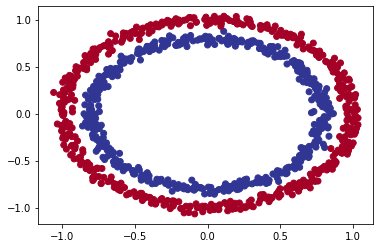

In [7]:
# Visuialize with a plot
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu) # Color map:Red, yellow, Blue
plt.show()

Alright, looks like we're dealing with a binary classification problem. It's binary because there are only two labels (0 or 1).

If there were more label options (e.g. 0, 1, 2, 3 or 4), it would be called multiclass classification.

🛠 Practice: Before pushing forward, you might want to spend 10 minutes playing around with the TensorFlow Playground. Try adjusting the different hyperparameters you see and click play to see a neural network train. I think you'll find the data very similar to what we've just created.

https://playground.tensorflow.org/

# Input and output shapes
One of the most common issues you'll run into when building neural networks is shape mismatches.

More specifically, the shape of the input data and the shape of the output data.

In our case, we want to input X and get our model to predict y.

So let's check out the shapes of X and y.

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

This means our neural network input shape will has to accept a tensor with at least one dimension being two and output a tensor with at least one value.

🤔 Note: y having a shape of (1000,) can seem confusing. However, this is because all y values are actually scalars (single values) and therefore don't have a dimension. For now, think of your output shape as being at least the same value as one example of y (in our case, the output from our neural network has to be at least one value).

# Steps in modelling
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
2. Compimling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. Fitting a model - letting the model try to find patterns in the data (how does X get to y).
Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.

# Build `model_1`

In [9]:
# Set the random seed
tf.random.set_seed = 42

# 1- Creat the model using Sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])
# 2- Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3- Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.2384 - accuracy: 0.4810
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 1.3339 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7292 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7040 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.4870


Not Good!

The model is about 50  percent accurate

# Evaluate `model_1`

In [10]:
# Lets try to improve our model 
model_1.fit(X,y, epochs=100, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5250


[0.6932255029678345, 0.5249999761581421]

 Since we are working on binary classification problem and our model is around 50% accurate, it is performing as it is guessing.
 

Even after 100 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

# Build `model_2`

In [11]:
# Set the random seed
tf.random.set_seed = 42

# 1- Creat the model using Sequential API
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])
# 2- Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3- Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# Evaluate `model_2`

In [12]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5390


[0.693213701248169, 0.5389999747276306]

In [13]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

# Improving a model
To improve our model, we can alter almost every part of the 3 steps we went through before.

1. Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).


There are many different ways to potentially improve a neural network. Some of the most common include:
* increasing the number of layers (making the network deeper),
* increasing the number of hidden units (making the network wider) and
* changing the learning rate. 

Because these values are all human-changeable, 
they're referred to as hyperparameters) and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.

# Build `model_3`

In [14]:
# set random seeds
tf.random.set_seed = 42

# 1- Creat the model using Sequential API
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # Add 100 dense neurons
                               tf.keras.layers.Dense(10), # Add another layer with 10 neurons
                               tf.keras.layers.Dense(1)
                                   
])

#2- Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), # Because of this part we cannot use it for the regression problem mentined below!
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#3- Fit the model
model_3.fit(X,y, epochs=100, verbose=0)


# Evaluate `model_3`

In [15]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.5130


[0.6987120509147644, 0.5130000114440918]

Let's make some visualizations to see what's happening.

🔑 Note: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


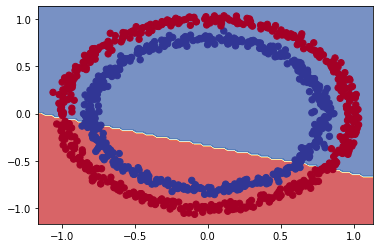

In [17]:
# Check out the predictions our model is making 
plot_decision_boundary(model_3, X, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [18]:
# Set random seed
tf.random.set_seed = 42

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5) # y = X + 100

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)
# If you fit model_3 to the data we will have the following error:

# ValueError: Input 0 of layer sequential_7 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)

Recreate model_3 and change tje loss function only!!!!

In [19]:
# set random seeds
tf.random.set_seed = 42

# 1- Creat the model using Sequential API
model_3r = tf.keras.Sequential([
                               tf.keras.Input(shape=[1]),
                               tf.keras.layers.Dense(100), # Add 100 dense neurons
                               tf.keras.layers.Dense(10), # Add another layer with 10 neurons
                               tf.keras.layers.Dense(1)   
])

#2- Compile the model
model_3r.compile(loss=tf.keras.losses.mae, # Because of this part we cannot use it for the regression problem mentioned below!
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

#3- Fit the model
model_3r.fit(X_reg_train,y_reg_train, epochs=100, verbose=0)

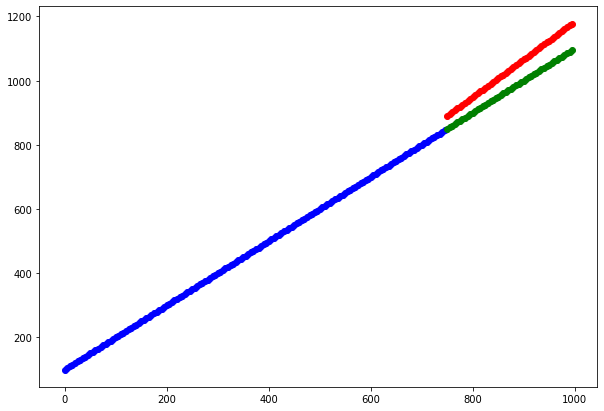

In [20]:
# Make prediction with our trained model
y_reg_preds = model_3r.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', Label='Training Data')
plt.scatter(X_reg_test, y_reg_test, c='g', Label='Test Data')
plt.scatter(X_reg_test, y_reg_preds, c='r', Label='Predictions')

The predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we're missing out on for our classification problem.

There must be something we're missing out on for our classification problem.

# The missing piece: Non-linearity

# Build `model_4`

In [21]:
tf.random.set_seed = 42
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
                               tf.keras.layers.Dense(1)    # output layer                        
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics='accuracy')

history = model_4.fit(X,y, epochs=100, verbose=0)

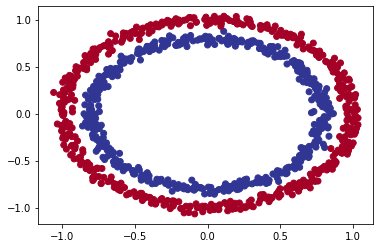

In [22]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

doing binary classifcation...


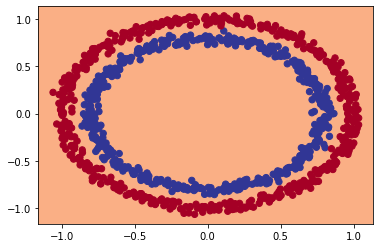

In [23]:
# Check the decesion boundary for our latest model
plot_decision_boundary(model_4, X, y)

# Evaluate `model_4`

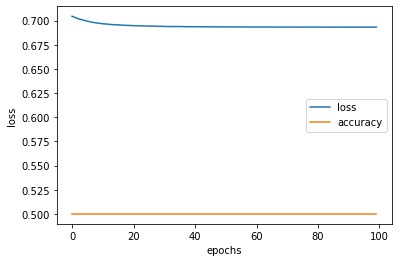

In [24]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Well, it looks like we're getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)...

**What we're going to have to do is add some non-linearity to our model. To do so, we'll use the activation parameter in on of our layers.**

# Build `model_5`
Non linear activation functions

In [25]:
# Set random seed
tf.random.set_seed = 42

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([ 
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
                               tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

doing binary classifcation...


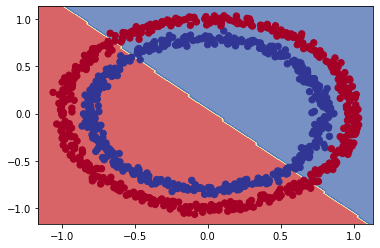

In [26]:
# Check the decesion boundary for our latest model
plot_decision_boundary(model_5, X, y)

still not learning...

What we if increased the number of neurons and layers?

Say, 2 hidden layers, with ReLU, pronounced "rel-u", (short for rectified linear unit), activation on the first one, and 4 neurons each?

To see this network in action, check out the TensorFlow Playground demo.

https://drive.google.com/file/d/1mmnxXU2Ej5TOp4AlyWybjNLgEpGR5qXQ/view?usp=sharing

![](https://drive.google.com/uc?id=1mmnxXU2Ej5TOp4AlyWybjNLgEpGR5qXQ)





# Build `model_6`

In [27]:
tf.random.set_seed = 42

model_6 = tf.keras.Sequential([
                     tf.keras.layers.Dense(4, activation='relu'), # hidden layer 1
                     tf.keras.layers.Dense(4, activation='relu'), # # hidden layer 2
                     tf.keras.layers.Dense(1)
])
    
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# model_6.compile(loss='binary_crossentropy',
#                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#                 metrics=['accuracy'])

history = model_6.fit(X, y, epochs=200, verbose=0)

# Evaluate `model_6`

In [28]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classifcation...


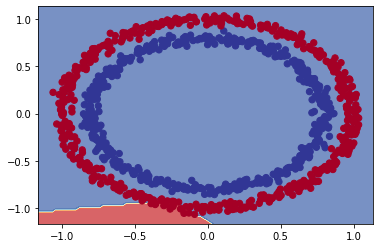

In [29]:
# Check the decesion boundary for our latest model
plot_decision_boundary(model_6, X, y)

In [30]:
tf.random.set_seed = 42

model_7 = tf.keras.Sequential([
                     tf.keras.layers.Dense(4, activation='relu'), # hidden layer 1
                     tf.keras.layers.Dense(4, activation='relu'), # # hidden layer 2
                     tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])
    
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])


history = model_7.fit(X, y, epochs=100, verbose=0)

# Evaluate `model_7`


In [31]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8730


[0.40930259227752686, 0.8730000257492065]

doing binary classifcation...


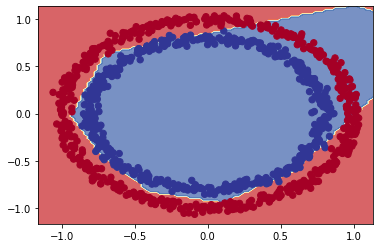

In [32]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

🤔 **Question**: What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

🔑 **Note**: The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

# Different activation functions

In [33]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

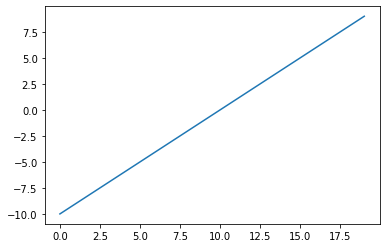

In [34]:
# Visualize our toy tensor
plt.plot(A);

Nice, now let's recreate the sigmoid function and see what it does to our data. You can also find a pre-built sigmoid function at tf.keras.activations.sigmoid.

Sigmoid

In [35]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

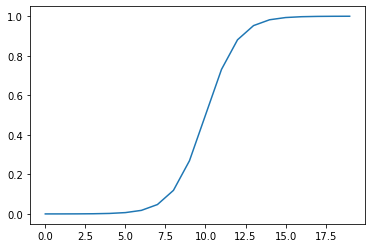

In [36]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

The ReLU function 

In [37]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

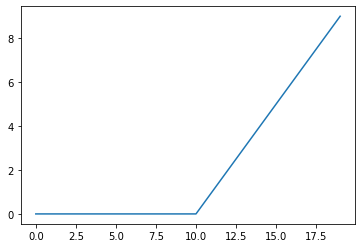

In [38]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

TensorFlow's linear activation function?

In [39]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [40]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Okay, so it makes sense now the model doesn't really learn anything when using only linear activation functions, because the linear activation function doesn't change our input data in anyway.

Where as, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its inputs and outputs.

Now rather than dive into the guts of neural networks, we're going to keep coding applying what we've learned to different problems but if you want a more in-depth look at what's going on behind the scenes, check out the Extra Curriculum section below.

📖 Resource: For more on activation functions, check out the [machine learning cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#) page on them.

# Evaluating and improving our classification

In [41]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [42]:
tf.random.set_seed = 42

model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')                         
])

model_8.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics='accuracy')

history = model_8.fit(X_train, y_train, epochs=25, verbose=0)

# Evaluate `model_8`

In [43]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {accuracy}')

7/7 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.9500
Model loss on the test set: 0.17615386843681335
Model accuracy on the test set: 0.949999988079071


The better results are because of changing a few things:

* The activation parameter - We used strings ("relu" & "sigmoid") instead of using library paths (tf.keras.activations.relu), in TensorFlow, they both offer the same functionality.
* The learning_rate (also lr) parameter - We increased the learning rate parameter in the Adam optimizer to 0.01 instead of 0.001 (an increase of 10x).
  * You can think of the learning rate as how quickly a model learns. The higher the learning rate, the faster the model's capacity to learn, however, there's such a thing as a too high learning rate, where a model tries to learn too fast and doesn't learn anything. We'll see a trick to find the ideal learning rate soon.
* The number of epochs - We lowered the number of epochs (using the epochs parameter) from 100 to 25 but our model still got an incredible result on both the training and test sets.
  * One of the reasons our model performed well in even less epochs (remember a single epoch is the model trying to learn patterns in the data by looking at it once, so 25 epochs means the model gets 25 chances) than before is because we increased the learning rate.

doing binary classifcation...
doing binary classifcation...


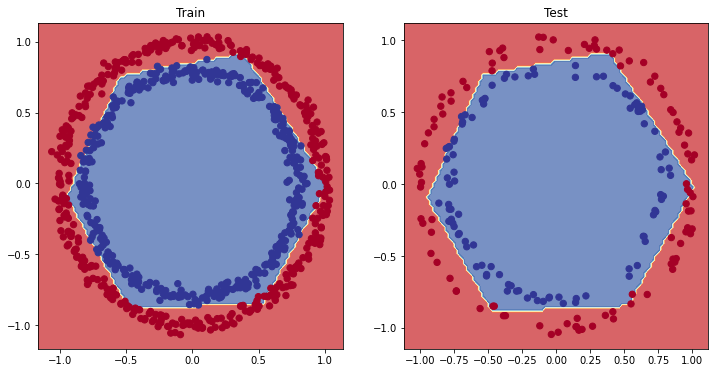

In [44]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

# Plot the loss curve

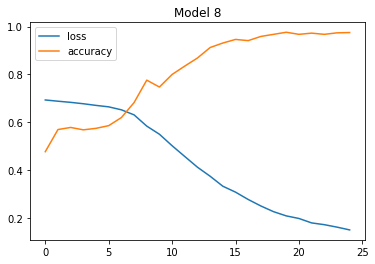

In [45]:
pd.DataFrame(history.history).plot()
plt.title('Model 8');

🔑 Note: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

# Finding the best learning rate
Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the learning rate.

In model_8 you saw we lowered the Adam optimizer's learning rate from the default of 0.001 (default) to 0.01.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:

* A learning rate callback.
 * You can think of a callback as an extra piece of functionality you can add to your model while its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.
We'll go through each with code, then explain what's going on.

🔑 Note: The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the Adam optimizer's default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

# Build `model_9`

In [46]:
tf.random.set_seed = 42

model_9 = tf.keras.Sequential([
                         tf.keras.layers.Dense(4, activation='relu'),
                         tf.keras.layers.Dense(4, activation='relu'),
                         tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

history = model_9.fit(X_train, y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler], verbose=0)

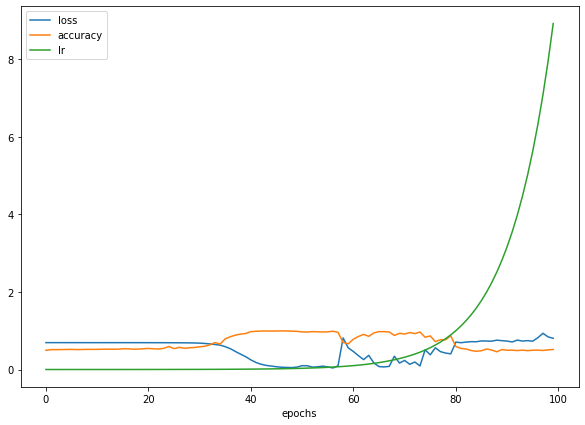

In [47]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

The learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

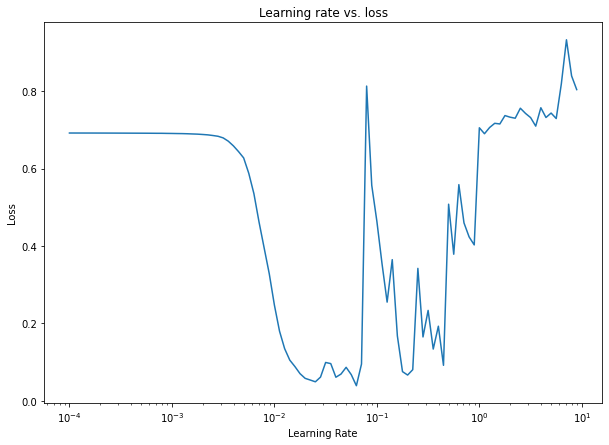

In [48]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out **(usually about 10x smaller than the bottom of the curve**).

In this case, our ideal learning rate ends up between 0.01 (
10
−
2
) and 0.02.

https://drive.google.com/file/d/1nkQysZ8FXhsw99IoBLpLUdGDER0vqHkM/view?usp=sharing

![](https://drive.google.com/uc?id=1nkQysZ8FXhsw99IoBLpLUdGDER0vqHkM)

Example of other typical learning rate values


```
10**0, 10**-1, 10**-2, 10**-3, 1e-4
```



Estimation based on the ideal learning rate (use 0.02) for the model, let's refit it.

In [49]:
# Set the random seed
tf.random.set_seed = 42

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Nice! With a little higher learning rate (0.02 instead of 0.01) we reach a higher accuracy than model_8 in less epochs (20 instead of 25).

🛠 Practice: Now you've seen an example of what can happen when you change the learning rate, try changing the learning rate value in the TensorFlow Playground and see what happens. What happens if you increase it? What happens if you decrease it?

#Evaluate `model_10`

In [50]:
model_10.evaluate(X_test, y_test), model_10.evaluate(X_train, y_train), 

25/25 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.9613


([0.12507112324237823, 0.9599999785423279],
 [0.11073603481054306, 0.9612500071525574])

doing binary classifcation...
doing binary classifcation...


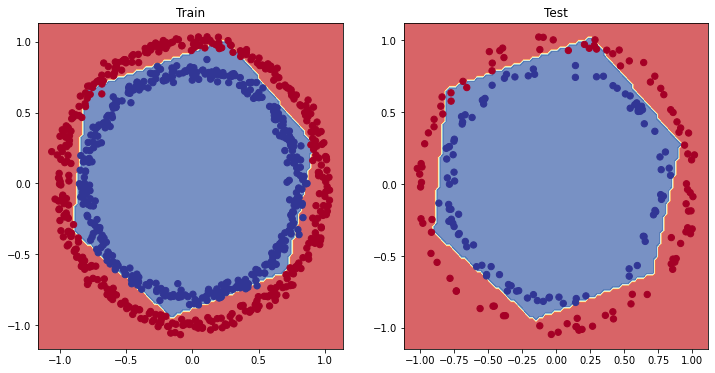

In [51]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

# More classification evaluation methods

🔑 Note: Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones below.

https://drive.google.com/file/d/1XAKoTsrQc9aIYRgEaOkCPNSxbdzg9Rjt/view?usp=sharing

![](https://drive.google.com/uc?id=1XAKoTsrQc9aIYRgEaOkCPNSxbdzg9Rjt)

![](https://drive.google.com/uc?id=13hFW-Fwv8iw7Ga8UJw0IfNpNyWwbf5q2)

# Check the accuray of model_10

In [52]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1251 - accuracy: 0.9600
Model loss on test set: 0.12507112324237823
Model accuracy on test set: 96.00%


**Anatomy of a confusion matrix**
![](https://drive.google.com/uc?id=126en2Dz9EjK5Dxow8OYiR3U1Rf1AxNUa)

In [53]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix

# confusion_matrix(y_test, y_preds)  

The above command raise ValueError: Classification metrics can't handle a mix of binary and continuous targets.

 It seems our predictions aren't in the format they need to be.

In [54]:
# View the first 10 predictions
y_preds[:10]

array([[0.9517185 ],
       [0.99611604],
       [0.9882113 ],
       [0.9691175 ],
       [0.22004032],
       [0.00436929],
       [0.9983709 ],
       [0.00541452],
       [0.99644506],
       [0.02571759]], dtype=float32)

In [55]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (9.8526537e-01), they're in a form called prediction probabilities.

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how likely they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

**In our case, since our ground truth labels (y_test) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using tf.round().**

In [56]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [57]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[93,  8],
       [ 0, 99]])

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 

# Plot classification report confusion matrix of dummy
print(classification_report(y_test, tf.round(y_preds)))
# plot_confusion_matrix(model_10, X_test, y_test, normalize='true')

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       101
           1       0.93      1.00      0.96        99

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [59]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

def plot_cm_matrix(y_test, y_preds):
  import itertools
  figsize = (7, 7)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(15)
  ax.yaxis.label.set_size(15)
  ax.title.set_size(15)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

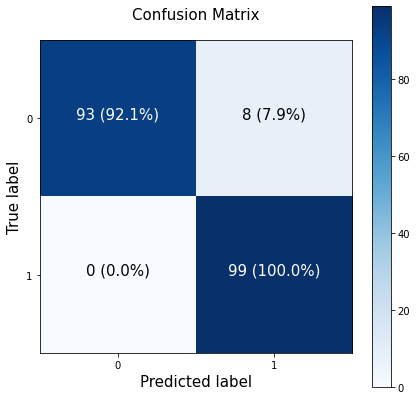

In [60]:
plot_cm_matrix(y_test, y_preds)

# Multiclass lassification

When you have more than two classes as an option, this is known as multiclass classification.

 The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

We can import it using the tf.keras.datasets module.

📖 Resource: The following multiclass classification problem has been adapted from the TensorFlow classification guide. A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

In [61]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [62]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [63]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [64]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Okay, 60,000 training examples each with shape (28, 28) and a label each as well as 10,000 test examples of shape (28, 28).

But these are just numbers, let's visualize.

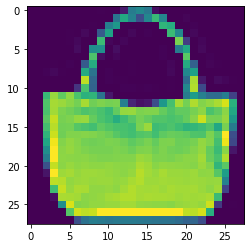

In [65]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[100]);

In [66]:
 train_labels[0]

9

It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

Let's create a small list of the class names (we can find them on the dataset's GitHub page).

🔑 Note: Whilst this dataset has been prepared for us and ready to go, it's important to remember many datasets won't be ready to go like this one. Often you'll have to do a few preprocessing steps to have it ready to use with a neural network (we'll see more of this when we work with our own data later).

In [67]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)


10

🤔 **Question**: Pay particular attention to what the data we're working with looks like. Is it only straight lines? Or does it have non-straight lines as well? Do you think if we wanted to find patterns in the photos of clothes (which are actually collections of pixels), will our model need non-linearities (non-straight lines) or not?

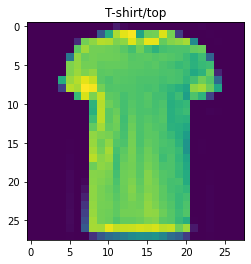

In [68]:
# Plot an example image and its label
plt.imshow(train_data[17],)# cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

In [69]:
train_labels.shape

(60000,)

In [70]:
train_labels[17]

0

In [71]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

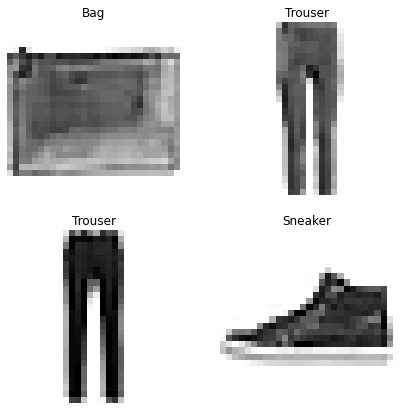

In [72]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [73]:
random.choice(range(len(train_data)))

26954

let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

The input shape will have to deal with 28x28 tensors (the height and width of our images).
We're actually going to squash the input into a tensor (vector) of shape (784).

The output shape will have to be 10 because we need our model to predict for 10 different classes.

We'll also change the activation parameter of our output layer to be "softmax" instead of '**sigmoid**'. As we'll see the "**softmax**" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
We'll need to change our loss function from a binary loss function to a multiclass loss function.

**More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy()**.

**If our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().**

We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [74]:
# Set random seed
tf.random.set_seed = 42

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3097 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3027 - val_accuracy:

In [75]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


The model gets to about ~35% accuracy after 10 epochs using a similar style model to what we used on our binary classification problem.

Which is better than guessing (guessing with 10 classes would result in about 10% accuracy) but we can do better.

Do you remember when we talked about neural networks preferring numbers between 0 and 1? (if not, treat this as a reminder)

Well, right now, the data we have isn't between 0 and 1, in other words, it's not normalized (hence why we used the non_norm_history variable when calling fit()). **It's pixel values are between 0 and 255**.

In [76]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).

Doing so will result in all of our data being between 0 and 1 (**known as scaling or normalization**).

In [77]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [78]:
train_data.shape, train_data[1].shape, train_data[1][1]

((60000, 28, 28),
 (28, 28),
 array([0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ]))

In [79]:
# Set random seed
tf.random.set_seed = 42

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data, train_labels, epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5442 - accuracy: 0.4415 - val_loss: 1.1892 - val_accuracy: 0.5678
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0667 - accuracy: 0.6261 - val_loss: 1.0172 - val_accuracy: 0.6577
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9393 - accuracy: 0.6705 - val_loss: 0.9234 - val_accuracy: 0.6732
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8887 - accuracy: 0.6795 - val_loss: 0.8866 - val_accuracy: 0.6852
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8625 - accuracy: 0.6865 - val_loss: 0.8894 - val_accuracy: 0.6869
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8460 - accuracy: 0.6917 - val_loss: 0.8566 - val_accuracy: 0.6933
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8312 - accuracy: 0.7005 - val_loss: 0.8554 - val_accuracy:

we used the exact same model as before but we with normalized data we're now seeing a much higher accuracy value!

Let's plot each model's history (their loss curves).

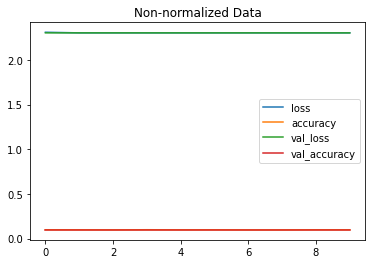

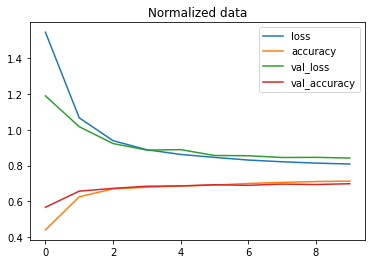

In [80]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

We can see how much quicker our model with the normalized data (model_12) improved than the model with the non-normalized data (model_11).

🔑 Note: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

# Finding the ideal learning rate

In [81]:
# Set random seed
tf.random.set_seed = 42

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data, train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler], verbose=0)

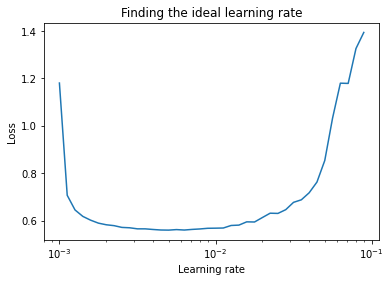

In [82]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to the default learning rate of the Adam optimizer (0.001) is the ideal learning rate.

Let's refit a model using the ideal learning rate.

In [83]:
# Set random seed
tf.random.set_seed = 42

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data, train_labels, epochs=20,
                       validation_data=(test_data, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1809 - accuracy: 0.5630 - val_loss: 0.8389 - val_accuracy: 0.7172
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7192 - accuracy: 0.7467 - val_loss: 0.7016 - val_accuracy: 0.7520
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6467 - accuracy: 0.7732 - val_loss: 0.6707 - val_accuracy: 0.7675
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6091 - accuracy: 0.7875 - val_loss: 0.6275 - val_accuracy: 0.7805
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5921 - accuracy: 0.7936 - val_loss: 0.6384 - val_accuracy: 0.7722
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5809 - accuracy: 0.7966 - val_loss: 0.6117 - val_accuracy: 0.7879
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5732 - accuracy: 0.7995 - val_loss: 0.6194 - val_accuracy:

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
* Assess some of its predictions (through visualizations).
Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.
Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.

In [84]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[3.2091055e-08, 3.9887545e-24, 2.4614034e-19, 1.2183132e-08,
        1.2101194e-23, 1.2441305e-01, 3.0630456e-14, 3.3380228e-01,
        1.1470302e-02, 5.3031439e-01],
       [2.0657755e-03, 2.2506678e-12, 9.1993451e-01, 9.6789726e-08,
        4.9832235e-03, 3.6161222e-29, 7.3015116e-02, 2.1199363e-15,
        1.1748558e-06, 2.2768863e-22],
       [3.0433373e-08, 9.9905616e-01, 1.1471915e-07, 1.3472750e-04,
        8.0713321e-04, 1.8178236e-28, 1.9213742e-06, 1.4106163e-22,
        2.8936069e-11, 5.6200365e-17],
       [8.4843236e-08, 9.9909496e-01, 5.4189763e-07, 1.5797796e-04,
        7.4288680e-04, 2.6807950e-22, 3.5650246e-06, 7.1496296e-19,
        2.5505748e-10, 2.7480356e-14],
       [2.0931208e-01, 8.7756416e-06, 1.9198766e-01, 1.6634692e-02,
        3.3597827e-02, 1.7159956e-17, 5.4316050e-01, 9.4730879e-10,
        5.2984245e-03, 1.0911311e-11]], dtype=float32)

Our model outputs a list of **prediction probabilities**, meaning, it outputs a number for **how likely it thinks a particular class is to be the label**.

**The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.**

To find the highest value we can use the argmax() method.

In [85]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

Now let's do the same for all of the predictions.



In [86]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Now we've got our model's predictions in label form, let's create a confusion matrix to view them against the truth labels.

In [87]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[755,   1,  24,  88,   3,   2, 115,   2,  10,   0],
       [  3, 943,  10,  37,   6,   0,   1,   0,   0,   0],
       [ 27,   5, 718,  15, 128,   0, 106,   0,   1,   0],
       [ 40,   6,   8, 845,  21,   2,  71,   1,   6,   0],
       [  4,   3, 153,  48, 690,   0, 102,   0,   0,   0],
       [  0,   0,   0,   1,   0, 892,   0,  71,   5,  31],
       [201,   4, 190,  58,  98,   1, 442,   0,   6,   0],
       [  0,   0,   0,   0,   0,  35,   0, 942,   0,  23],
       [ 50,   1,   6,  13,   1,   2,   8,  14, 902,   3],
       [  0,   0,   0,   0,   0,  27,   0,  56,   6, 911]])

In [88]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

That confusion matrix is hard to comprehend.

In [89]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [90]:
y_preds.shape

(10000,)

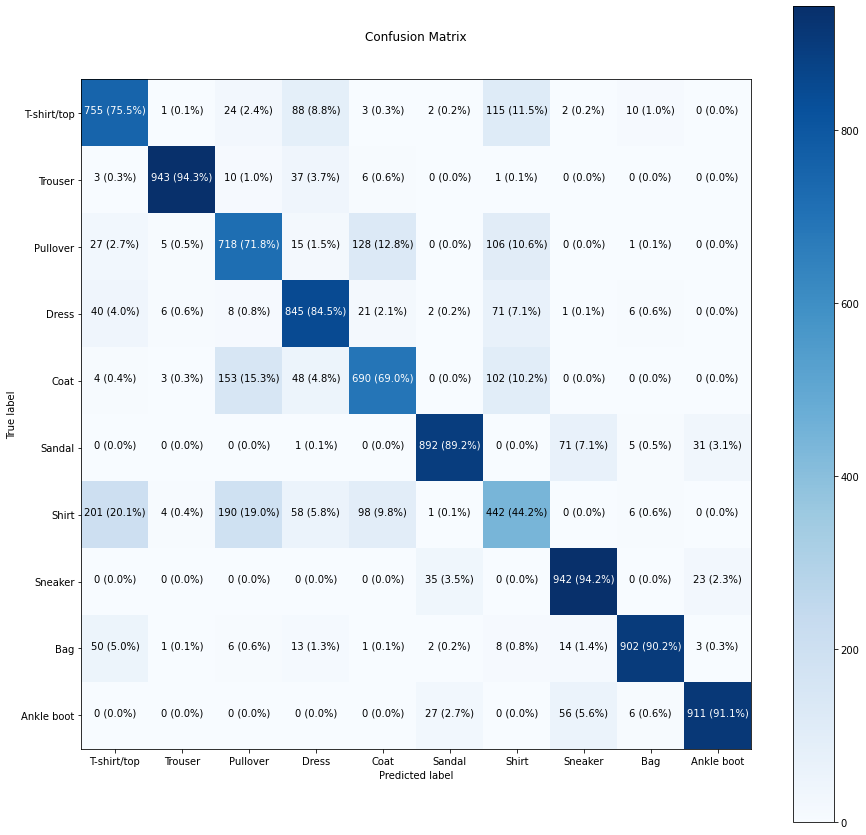

In [91]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [92]:
cm = confusion_matrix(y_true=test_labels, y_pred=y_preds)
np.arange(cm.shape[0])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [93]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [94]:
# Save a model using the SavedModel format....Creates a folder
model_14.save('model_14_CL_SavedModel_format')

INFO:tensorflow:Assets written to: model_14_CL_SavedModel_format/assets


In [95]:

# Save a model using the HDF5 format..... Creates a single file 
model_14.save("model_14_CL_HDF5_format.h5") # note the addition of '.h5' on the end

In [96]:
!ls model_14_CL_HDF5_format.h5

model_14_CL_HDF5_format.h5


In [97]:
!ls

drive  model_14_CL_HDF5_format.h5  model_14_CL_SavedModel_format  sample_data



It looks like our model is getting confused between the Shirt and T-shirt/top classes (e.g. predicting Shirt when it's actually a T-shirt/top).

🤔 Question: Does it make sense that our model is getting confused between the Shirt and T-shirt/top classes? Why do you think this might be? What's one way you could investigate?

We've seen how our models predictions line up to the truth labels using a confusion matrix, but how about we visualize some?

Let's create a function to plot a random image along with its prediction.

🔑 Note: Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [98]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

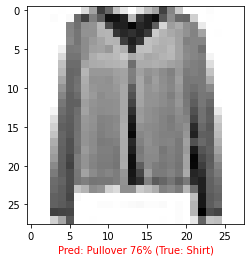

In [103]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

The model predict with 76% of chance that the image is pullover. 

It seems to mix up classes which are similar, for example, Sneaker with Ankle boot.

Looking at the images, you can see how this might be the case.

The overall shape of a Sneaker and an Ankle Boot are similar.

The overall shape might be one of the patterns the model has learned and so therefore when two images have a similar shape, their predictions get mixed up.

# What patterns is our model learning?¶


In [104]:
model_14.layers

And we can find the patterns learned by a particular layer using the get_weights() method.

The get_weights() method returns the weights (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.

# The Weight Matrix

In [105]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.02464539, -0.2402384 ,  0.3266801 , -0.10270482],
        [-0.25610912,  0.38274357,  0.3595499 , -0.09490065],
        [-1.2256275 , -0.35485703,  0.83332366,  1.1236094 ],
        ...,
        [ 0.36551782, -0.34478748,  0.48487413,  0.33498475],
        [ 0.5897796 , -0.15346447,  0.84637374, -0.41669542],
        [-0.33975345,  0.16795859,  0.07877614,  0.2079094 ]],
       dtype=float32), (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the kernel_initializer parameter when creating a layer, the default is "glorot_uniform") and are then updated to better representative values of the data (non-random) by the neural network during training.



# The bias vector.



In [106]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 0.30481243,  0.6819864 , -0.58115184,  0.1717306 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [107]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 3140      
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to every layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility plot_model().

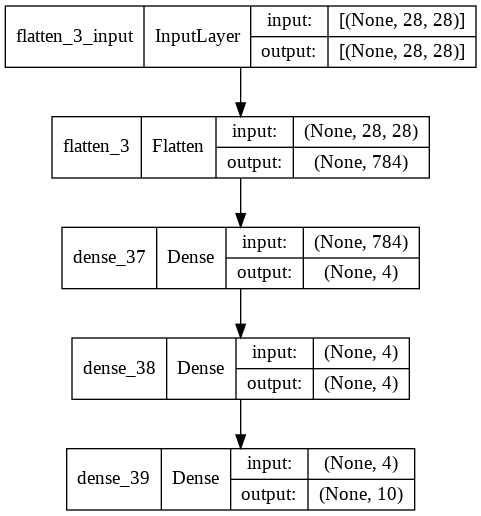

In [108]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

**How a model learns (in brief)¶**

Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called backpropagation.

In other words, data and labels pass through a model (forward pass) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (backward pass) and tweaking its weights matrices and bias values to better represent the data.